In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import os
# print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

In [51]:
train = pd.read_csv('train.csv');

In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
test = pd.read_csv('test.csv')

In [54]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
print(f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [58]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [59]:
# test
# t1 = train.isnull().sum().sort_values(ascending = False)[train.isnull().sum().sort_values(ascending = False) != 0]
# t2 = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,3)[round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]

# print(t1,t2)
all_data['1stFlrSF']

0       5.939034
1       6.234990
2       5.994336
3       6.027704
4       6.161221
          ...   
2912    5.590761
2913    5.590761
2914    6.211838
2915    6.034831
2916    6.055040
Name: 1stFlrSF, Length: 2917, dtype: float64

In [60]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,3)[round(df.isnull().sum().sort_values(ascending = False)/len(train)*100,2) != 0]
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [61]:
print(missing_percentage(train))
print()
print(missing_percentage(test))

              Total  Percent
PoolQC         1453   99.521
MiscFeature    1406   96.301
Alley          1369   93.767
Fence          1179   80.753
FireplaceQu     690   47.260
LotFrontage     259   17.740
GarageCond       81    5.548
GarageType       81    5.548
GarageYrBlt      81    5.548
GarageFinish     81    5.548
GarageQual       81    5.548
BsmtExposure     38    2.603
BsmtFinType2     38    2.603
BsmtFinType1     37    2.534
BsmtCond         37    2.534
BsmtQual         37    2.534
MasVnrArea        8    0.548
MasVnrType        8    0.548
Electrical        1    0.068

              Total  Percent
PoolQC         1456   99.794
MiscFeature    1408   96.504
Alley          1352   92.666
Fence          1169   80.123
FireplaceQu     730   50.034
LotFrontage     227   15.559
GarageCond       78    5.346
GarageQual       78    5.346
GarageYrBlt      78    5.346
GarageFinish     78    5.346
GarageType       76    5.209
BsmtCond         45    3.084
BsmtQual         44    3.016
BsmtExposure 

In [62]:
print(train['SalePrice'].skew())

1.8828757597682129


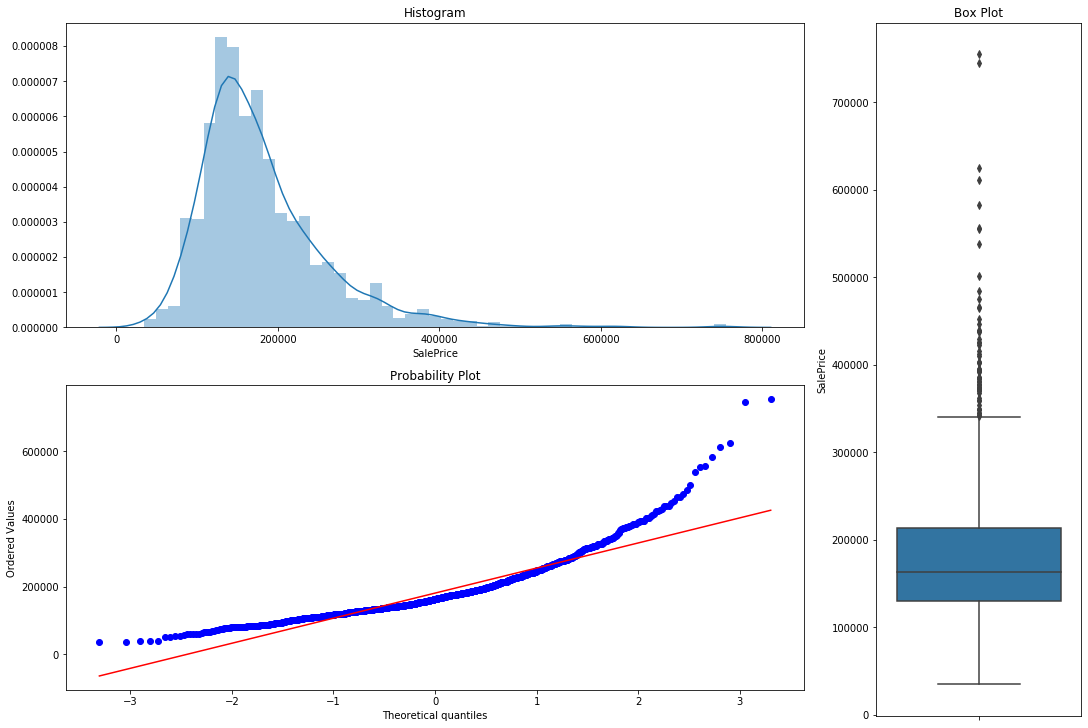

In [63]:
def plotting_3_chart(df, feature):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    
    fig = plt.figure(constrained_layout = True, figsize = (15, 10))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1) 
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2) 
    
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

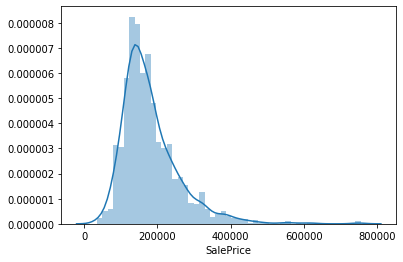

In [64]:
sns.distplot(train.loc[:,'SalePrice'])

In [65]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
BsmtHalfBath     0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
FullBath         0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

In [66]:
def customized_scatterplot(y,x):
    plt.subplots(figsize = (15, 10))
    sns.scatterplot(y = y, x = x)

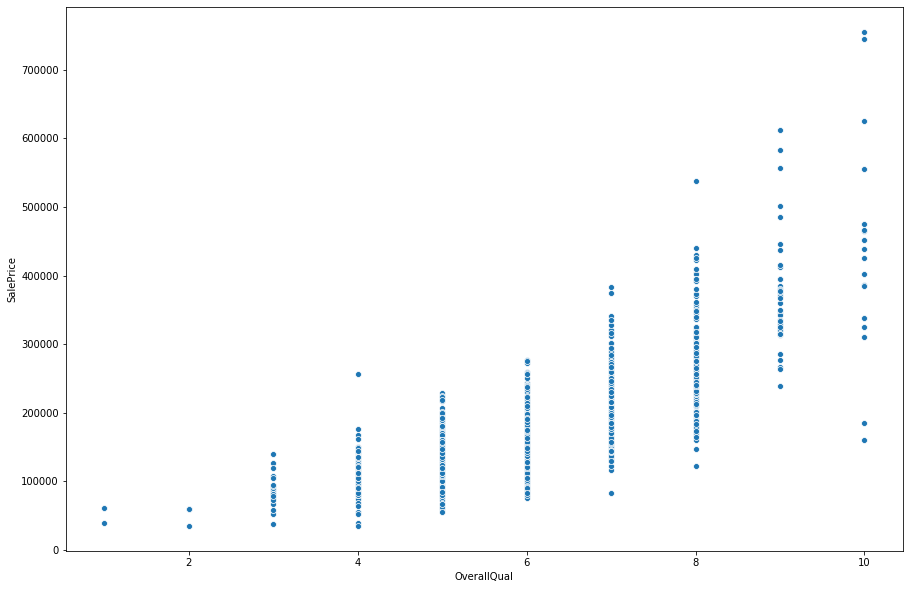

In [67]:
customized_scatterplot(train['SalePrice'], train['OverallQual'])

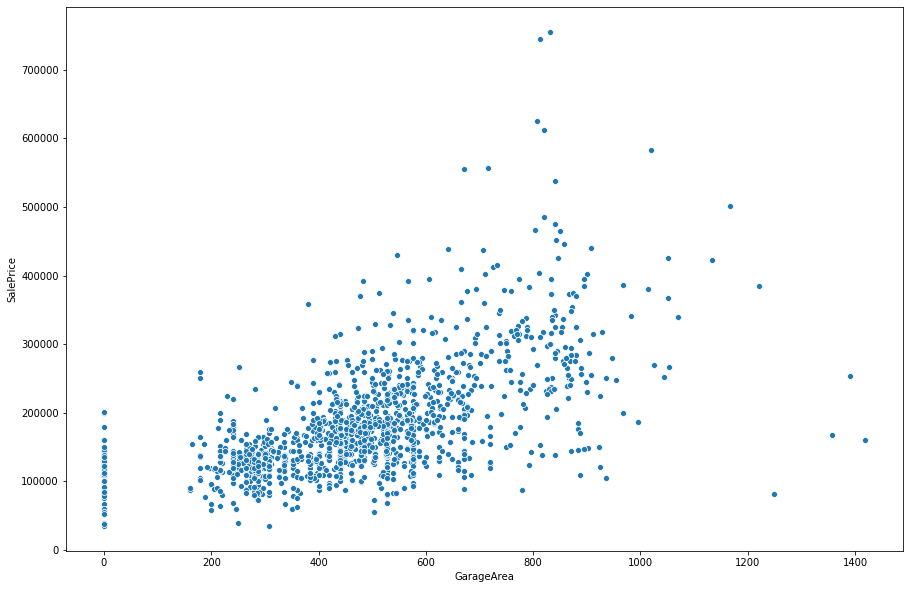

In [68]:
customized_scatterplot(train.SalePrice, train.GarageArea)

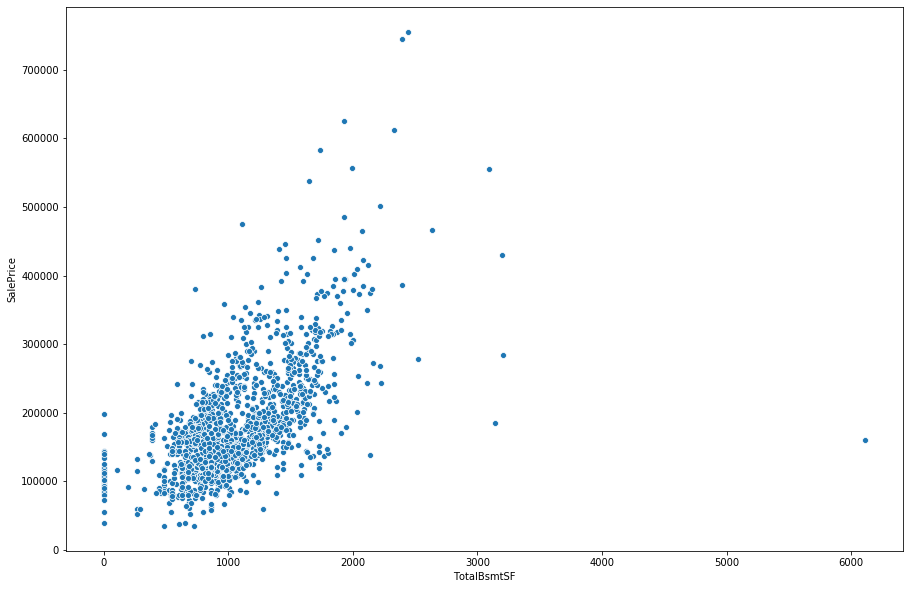

In [69]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

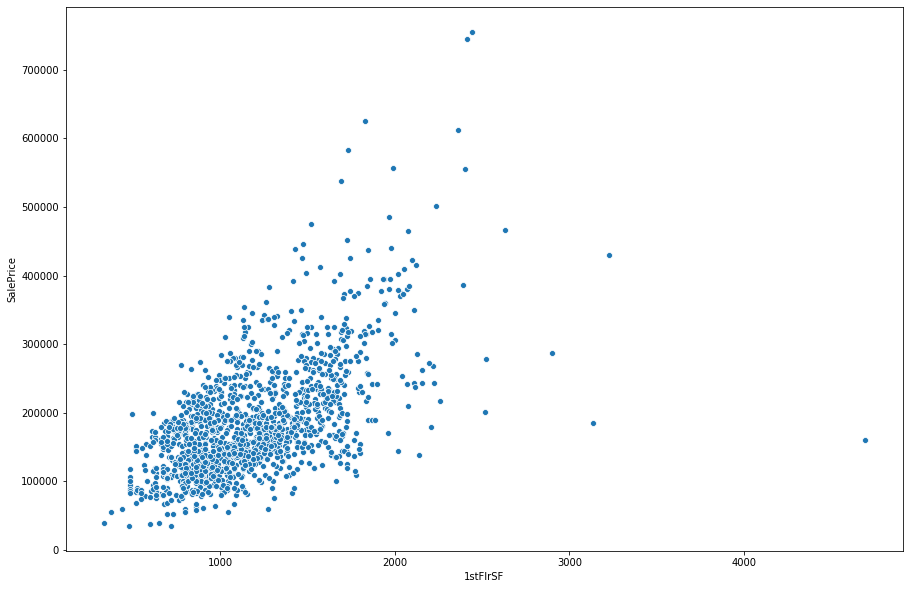

In [70]:










customized_scatterplot(train.SalePrice, train['1stFlrSF'])

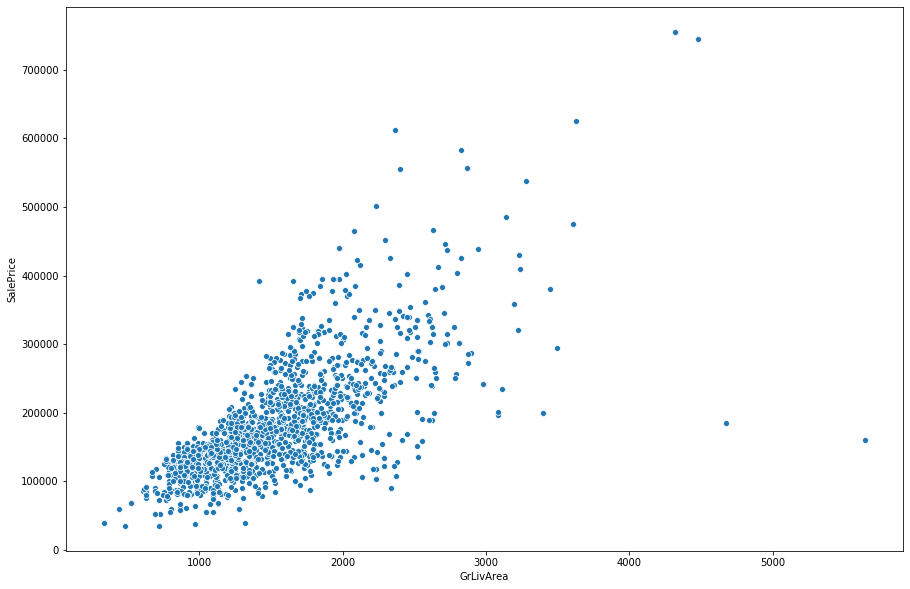

In [71]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

In [72]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)
previous_train = train.copy()

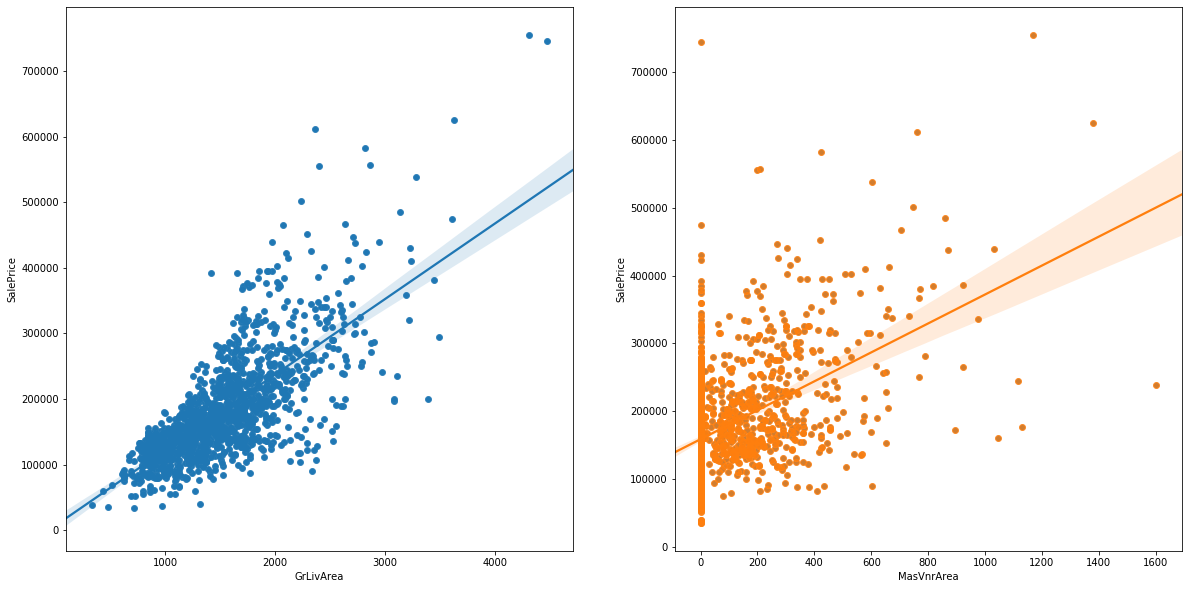

In [73]:
fig, (ax1, ax2)  = plt.subplots(figsize = (20, 10), ncols = 2, sharey = False)
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax1)
sns.regplot(x = train.GrLivArea, y = train.SalePrice, ax = ax1)
sns.scatterplot(x = train.MasVnrArea, y = train.SalePrice, ax = ax2)
sns.regplot(x = train.MasVnrArea, y = train.SalePrice, ax = ax2)

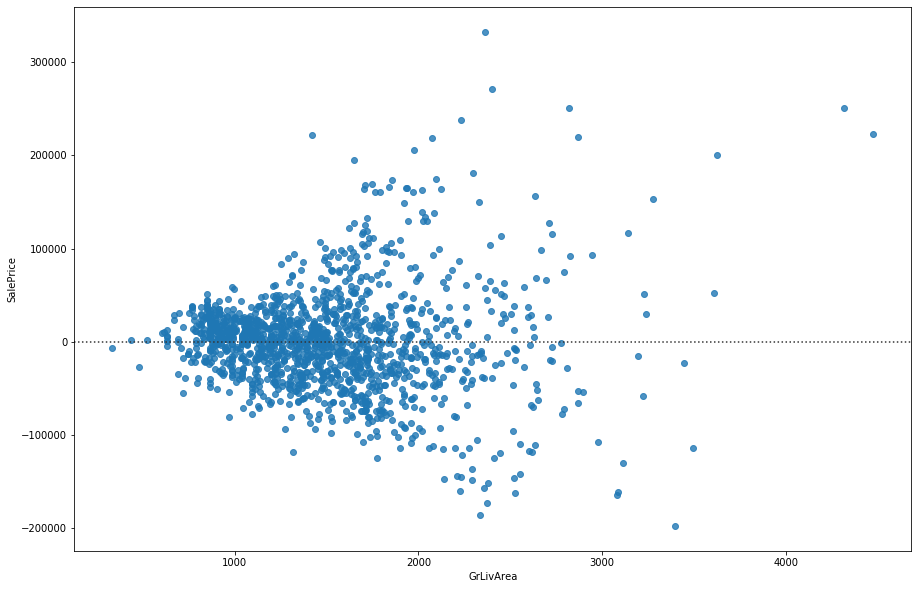

In [74]:
plt.subplots(figsize = (15, 10))
sns.residplot(train.GrLivArea, train.SalePrice)

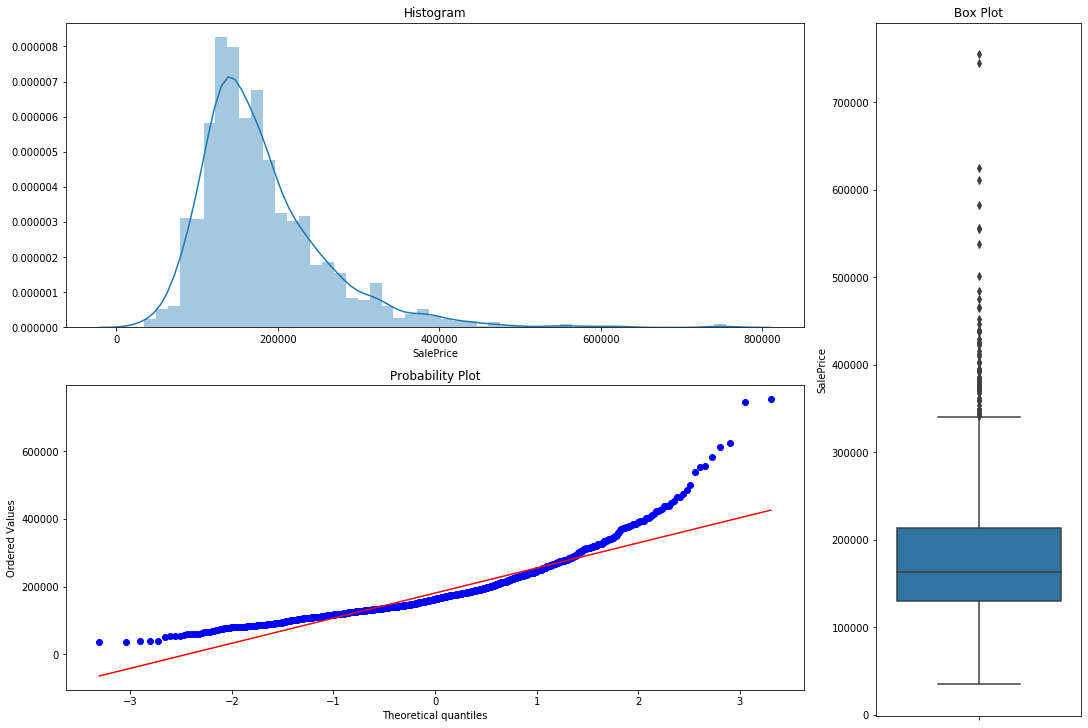

In [75]:
plotting_3_chart(train, 'SalePrice')

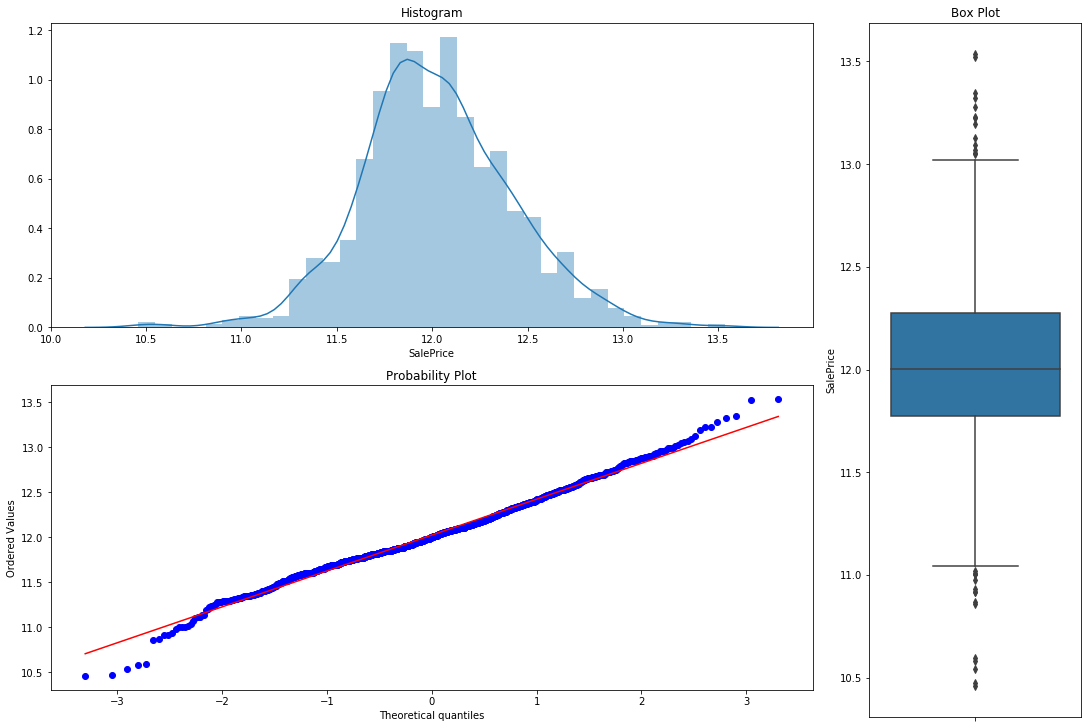

In [76]:
train['SalePrice'] = np.log1p(train['SalePrice'])
plotting_3_chart(train, 'SalePrice')

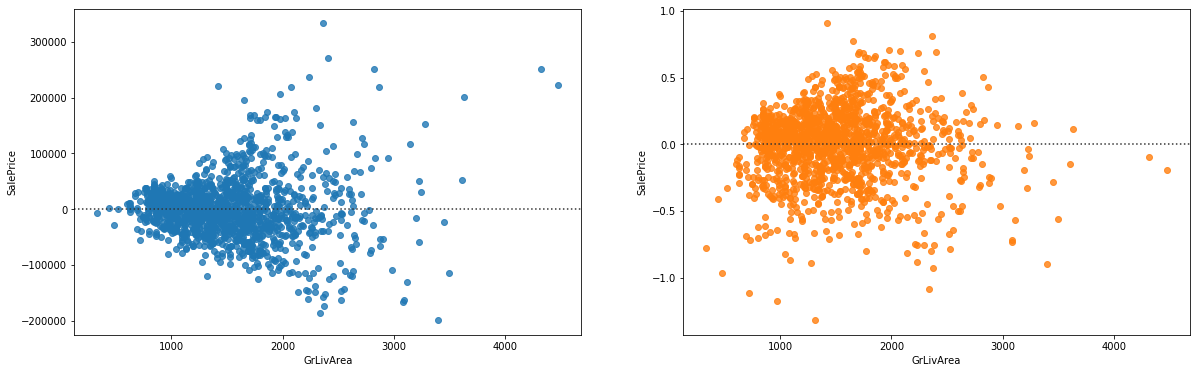

In [77]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2, sharey = False, sharex=False)
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

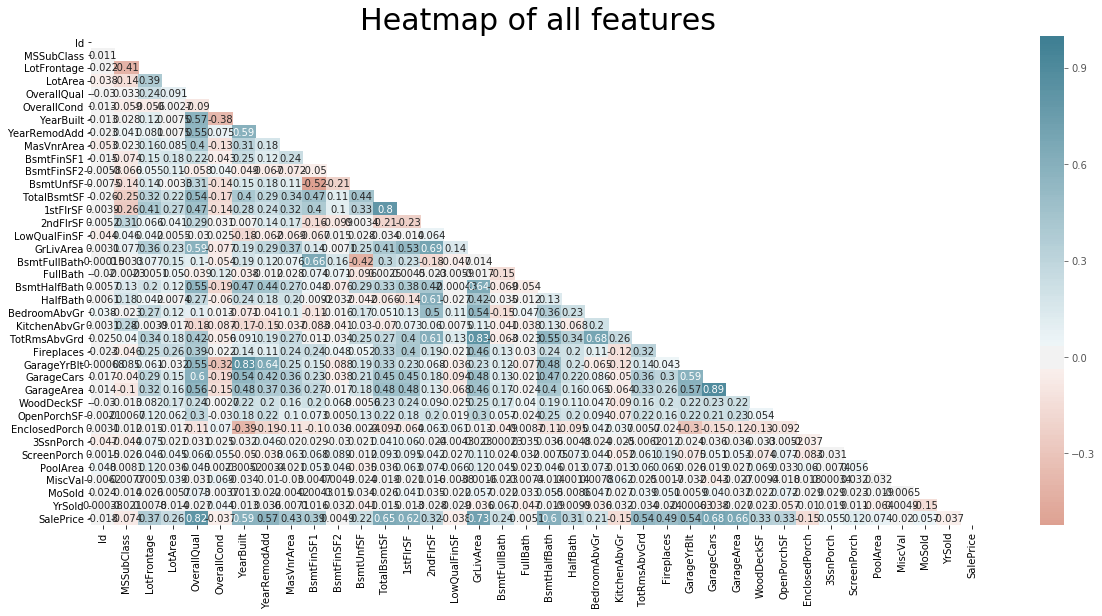

In [78]:
plt.subplots(figsize = (20, 9))
style.use('ggplot')
# sns.set_style('dark')
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), cmap = sns.diverging_palette(20, 220, n = 220), mask = mask, annot = True, center = 0, );
plt.title("Heatmap of all features", fontsize = 30);

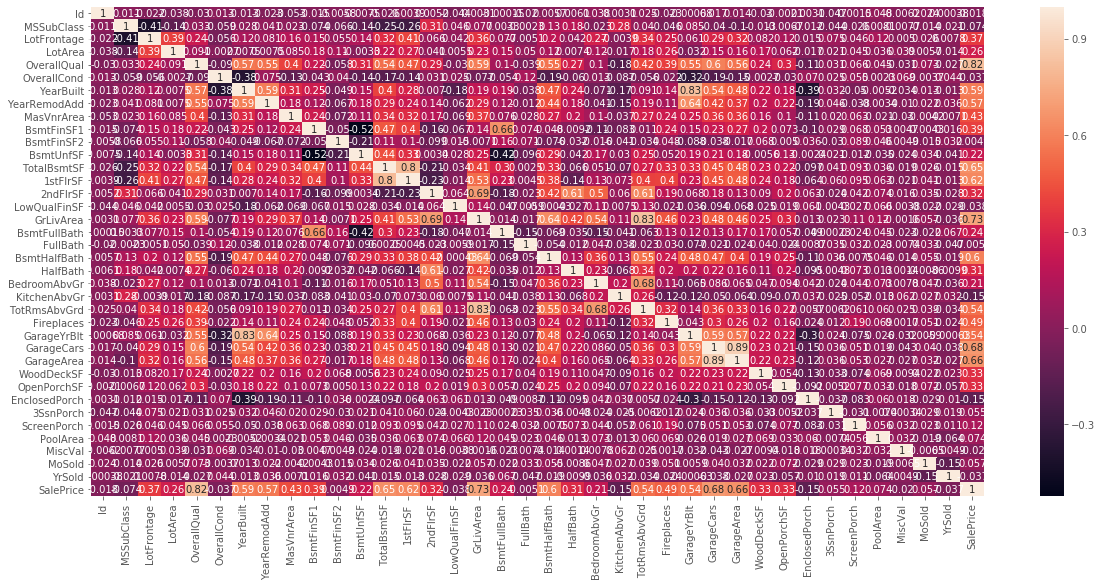

In [79]:
corr = train.corr()
plt.subplots(figsize = (20, 9))
sns.heatmap(corr, annot = True)

In [80]:
# Feature engineering
train.drop(columns = ['Id'], axis = 1, inplace = True)
test.drop(columns = ['Id'], axis = 1, inplace = True)
y = train['SalePrice'].reset_index(drop = True)
previous_train = train.copy()

In [81]:
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [82]:
missing_percentage(all_data)

,Total,Percent
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageFinish,159,5.451
GarageQual,159,5.451
GarageYrBlt,159,5.451
GarageCond,159,5.451


In [83]:
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']
for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [84]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']
for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)


In [85]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [86]:
all_data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2912    RM
2913    RM
2914    RL
2915    RL
2916    RL
Name: MSZoning, Length: 2917, dtype: object

In [87]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [88]:
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [89]:
all_data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2912    RM
2913    RM
2914    RL
2915    RL
2916    RL
Name: MSZoning, Length: 2917, dtype: object

In [90]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [91]:
missing_percentage(all_data)

,Total,Percent


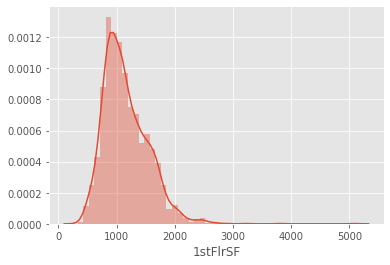

In [92]:
sns.distplot(all_data['1stFlrSF'])

In [93]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending = False)
skewed_feats

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.058803
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
FullBath          0.514697
BsmtHalfBath      0.469244
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

In [94]:
# fixing skewness
def fixing_skewness(df):
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending = False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

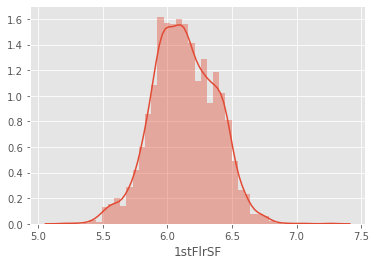

In [95]:
sns.distplot(all_data['1stFlrSF'])

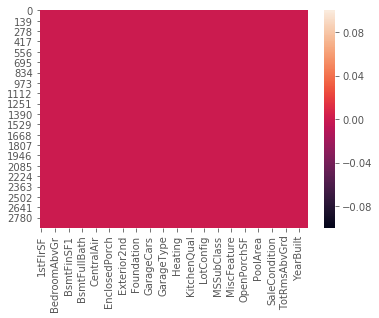

In [96]:
sns.heatmap(all_data.isnull())

In [97]:
all_data['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
2912    AllPub
2913    AllPub
2914    AllPub
2915    AllPub
2916    AllPub
Name: Utilities, Length: 2917, dtype: object

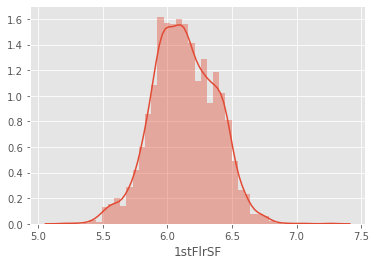

In [98]:
sns.distplot(all_data['1stFlrSF']);

In [99]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])


In [100]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [101]:
all_data.shape

(2917, 86)

In [102]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop = True)
final_features.shape

(2917, 333)

In [103]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

In [104]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [105]:
def overfit_reducer(df):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit

overfitted_features = overfit_reducer(X)
overfitted_features

['MSSubClass_150']

In [106]:
X = X.drop(overfitted_features, axis = 1)
X_sub = X_sub.drop(overfitted_features, axis = 1)

In [107]:
# Train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 0)

In [108]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((973, 332), (973,), (480, 332), (480,))

Text(0.5, 1.0, 'Chart with data points')

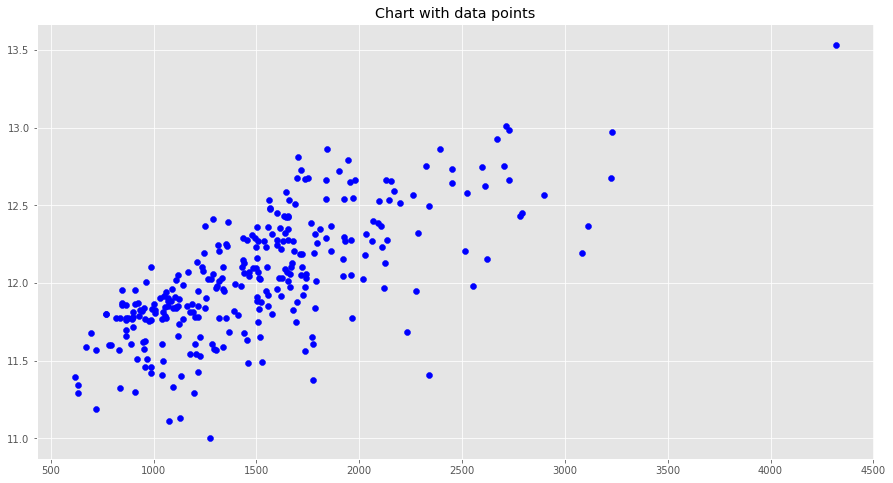

In [109]:
sample_train = previous_train.sample(300)
# import seaborn as sns
plt.subplots(figsize = (15, 8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color = 'b');
plt.title("Chart with data points")

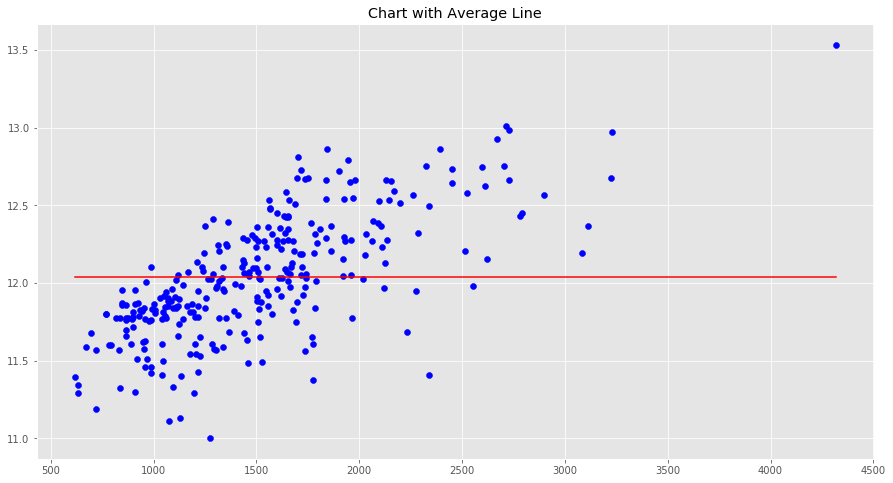

In [110]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [111]:
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()

0.15247433905743082

In [112]:
y_bar = sample_train.SalePrice.mean()
x_bar = sample_train.GrLivArea.mean()
std_y = sample_train.SalePrice.std()
std_x = sample_train.GrLivArea.std()
r_xy = sample_train.corr().loc['GrLivArea', 'SalePrice']
beta1 = r_xy * (std_y/std_x)
beta0 = y_bar - beta1*x_bar

In [113]:
sample_train['Linear_Yhat'] = beta0 + beta1*sample_train['GrLivArea']

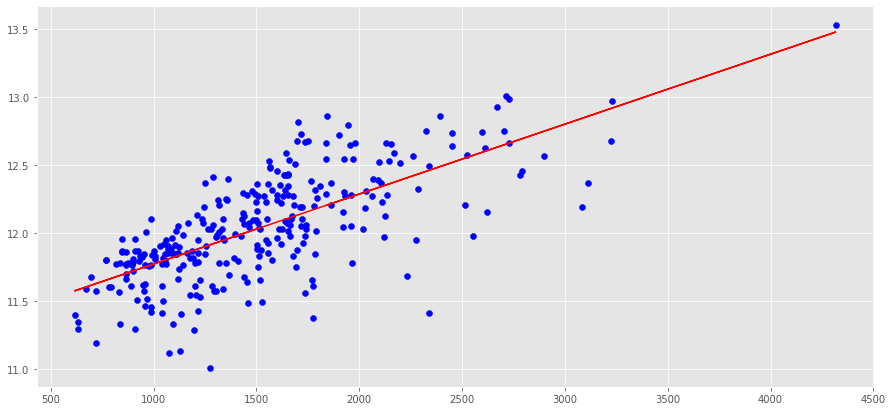

In [114]:
fig = plt.figure(figsize = (15, 7))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c = 'b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color = 'r')

In [115]:
np.square(sample_train.SalePrice - sample_train.Linear_Yhat).mean()

0.07511913985830726

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train.SalePrice, sample_train.Linear_Yhat)

0.0751191398583073

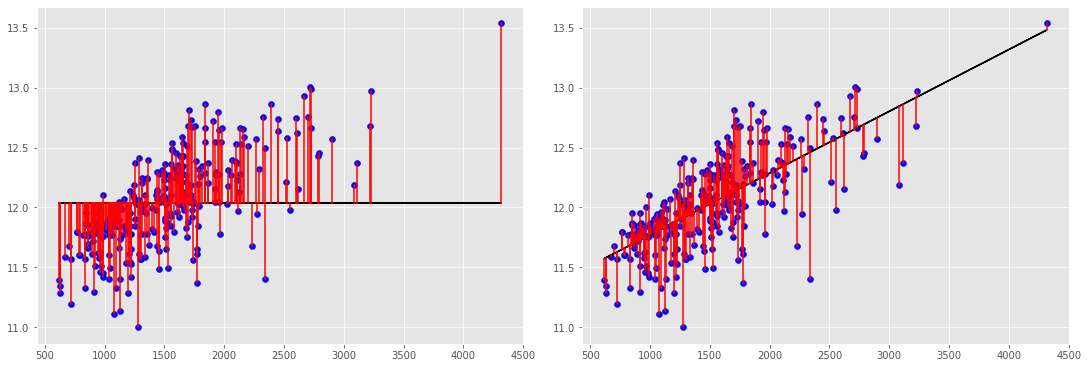

In [117]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax1.plot(sample_train['GrLivArea'], sample_train['mean_sale_price'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['mean_sale_price']), 'r-')
    
ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax2.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['Linear_Yhat']), 'r-')

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_reg = LinearRegression(normalize = True, n_jobs = -1)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [119]:
print('%.2f'%mean_squared_error(y_test, y_pred))

61372311469669449728.00


In [120]:
print ('%.2f'%mean_squared_error(y_test, y_pred))

61372311469669449728.00


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle = True, random_state = 2, n_splits = 10)
scores = cross_val_score(lin_reg, X, y, cv = cv, scoring = 'neg_mean_absolute_error')
print('%.8f'%scores.mean())

-0.23188167


In [132]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ridge = Ridge(alpha = i, normalize = True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [133]:
temp_mse

{-3: 37.77639752689388,
 -2: 182.02522378744845,
 -1: 126.54334830866611,
 1e-15: 0.012682134779772748,
 1e-10: 0.012686047527978497,
 1e-08: 0.012685939597784775,
 1e-05: 0.012605294176943449,
 0.0001: 0.012451590171763541,
 0.001: 0.012358805632410022,
 0.01: 0.012056104637806037,
 0.5: 0.012374604692101257,
 1: 0.013805774956637444,
 1.5: 0.015279631666537457,
 2: 0.016758290311059555,
 3: 0.019702583068740388,
 4: 0.02261295803014279,
 5: 0.025477043360973353,
 10: 0.03886237425125341,
 20: 0.06043261156414195,
 30: 0.0762685532961433,
 40: 0.08814064079065646}

In [134]:
for key, value in (sorted(temp_mse.items(), key = lambda item: item[1])):
    print("%s: %s" % (key, value))

0.01: 0.012056104637806037
0.001: 0.012358805632410022
0.5: 0.012374604692101257
0.0001: 0.012451590171763541
1e-05: 0.012605294176943449
1e-15: 0.012682134779772748
1e-08: 0.012685939597784775
1e-10: 0.012686047527978497
1: 0.013805774956637444
1.5: 0.015279631666537457
2: 0.016758290311059555
3: 0.019702583068740388
4: 0.02261295803014279
5: 0.025477043360973353
10: 0.03886237425125341
20: 0.06043261156414195
30: 0.0762685532961433
40: 0.08814064079065646
-3: 37.77639752689388
-1: 126.54334830866611
-2: 182.02522378744845


In [135]:
for key, value in (sorted(temp_rss.items(), key = lambda item: item[1])):
    print("%s: %s" % (key, value))

0.01: 5.786930226146902
0.001: 5.9322267035568075
0.5: 5.939810252208601
0.0001: 5.976763282446502
1e-05: 6.050541204932854
1e-15: 6.087424694290921
1e-08: 6.0892510069366885
1e-10: 6.089302813429672
1: 6.626771979185974
1.5: 7.334223199937985
2: 8.04397934930858
3: 9.457239872995386
4: 10.854219854468543
5: 12.228980813267205
10: 18.653939640601642
20: 29.00765355078814
30: 36.608905582148736
40: 42.30750757951515
-3: 18132.67081290906
-1: 60740.80718815976
-2: 87372.10741797523


In [152]:
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    lasso_reg = Lasso(alpha= i, normalize=True)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [155]:
for key, value in (sorted(temp_mse.items(), key = lambda item: item[1])):
    print("%s %s" % (key, value))

0.0001 0.01012204019678521
1e-05 0.011554326302921858
1e-08 0.012459545552857195
1e-10 0.01246459667196228
1e-15 0.012464644256971419
0.001 0.018212254255301413
0.01 0.15998234085337287
0.5 0.16529633945001213
1 0.16529633945001213
1.5 0.16529633945001213
2 0.16529633945001213
3 0.16529633945001213
4 0.16529633945001213
5 0.16529633945001213
10 0.16529633945001213
20 0.16529633945001213
30 0.16529633945001213
40 0.16529633945001213
-1 14092704430.348963
-2 56370819722.37269
-3 126834345876.08379


In [156]:
for key, value in (sorted(temp_rss.items(), key = lambda item: item[1])):
    print("%s %s" % (key, value))

0.0001 4.858579294456904
1e-05 5.546076625402498
1e-08 5.98058186537145
1e-10 5.983006402541894
1e-15 5.98302924334628
0.001 8.741882042544674
0.01 76.79152360961896
0.5 79.34224293600582
1 79.34224293600582
1.5 79.34224293600582
2 79.34224293600582
3 79.34224293600582
4 79.34224293600582
5 79.34224293600582
10 79.34224293600582
20 79.34224293600582
30 79.34224293600582
40 79.34224293600582
-1 6764498126567.508
-2 27057993466738.902
-3 60880486020520.195


In [159]:
from sklearn.linear_model import ElasticNet
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    elastic = ElasticNet(alpha = i, normalize = True)
    elastic.fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse = sum((y_pred - y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [160]:
for key,value in (sorted(temp_mse.items(), key = lambda item: item[1])):
    print("%s %s" % (key, value))

0.0001 5.009398850487104
1e-05 5.657178698521737
1e-08 5.9814230640846775
1e-10 5.9830128631042205
1e-15 5.983029243410977
0.001 7.160717703982191
0.01 52.682552794116255
0.5 79.34224293600582
1 79.34224293600582
1.5 79.34224293600582
2 79.34224293600582
3 79.34224293600582
4 79.34224293600582
5 79.34224293600582
10 79.34224293600582
20 79.34224293600582
30 79.34224293600582
40 79.34224293600582
-3 2580.0622823678277
-2 2619.1454478352816
-1 2742.009649169585


In [161]:
for key,value in (sorted(temp_rss.items(), key = lambda item: item[1])):
    print("%s %s" % (key, value))

-3 79.34224293600582
-2 79.34224293600582
-1 79.34224293600582
1e-15 79.34224293600582
1e-10 79.34224293600582
1e-08 79.34224293600582
1e-05 79.34224293600582
0.0001 79.34224293600582
0.001 79.34224293600582
0.01 79.34224293600582
0.5 79.34224293600582
1 79.34224293600582
1.5 79.34224293600582
2 79.34224293600582
3 79.34224293600582
4 79.34224293600582
5 79.34224293600582
10 79.34224293600582
20 79.34224293600582
30 79.34224293600582
40 79.34224293600582


In [162]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [163]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [164]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [165]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

In [169]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [170]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [171]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
score = cv_rmse(stack_gen)
print("Stack: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

[23:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge') 
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)


print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)